# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
#from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.layers import Activation, Dense, Input, Flatten


Using TensorFlow backend.


# Load the data

In [2]:
housing=pd.read_csv(r'E:\housing.csv')


   median_house_value  housing_median_age
0            452600.0                41.0
1            358500.0                21.0
2            352100.0                52.0
3            341300.0                52.0


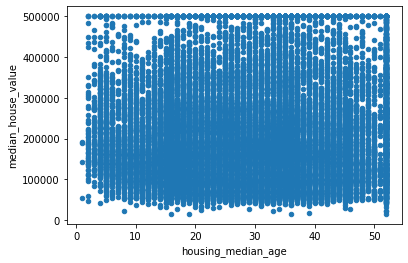

In [3]:

var="housing_median_age"
data=pd.concat([housing['median_house_value'],housing[var]],axis=1)
data.plot.scatter(x=var,y='median_house_value')
print(data[:4])



# Clean and describe the data

In [4]:
median = housing['total_bedrooms'].median()
housing.reset_index(drop = True)
housing['total_bedrooms'].fillna(median, inplace=True)

In [5]:
x=housing.iloc[:,:-2]
y=housing.iloc[:,-2]


In [6]:
transformer=Normalizer(norm='l1')
transformer.fit_transform(x)

array([[-0.07334819,  0.02273116,  0.02460342, ...,  0.19322684,
         0.0756105 ,  0.00499581],
       [-0.01024186,  0.00317261,  0.00175977, ...,  0.20120031,
         0.09536274,  0.00069565],
       [-0.04794953,  0.01484694,  0.02039738, ...,  0.1945596 ,
         0.06942953,  0.00284677],
       ...,
       [-0.02781328,  0.009047  ,  0.00390056, ...,  0.23105074,
         0.09934952,  0.00039006],
       [-0.03427489,  0.01113962,  0.0050853 , ...,  0.20934467,
         0.09859823,  0.00052751],
       [-0.02205567,  0.00716209,  0.00291068, ...,  0.25231951,
         0.09641625,  0.00043453]])

In [7]:
#x.head()
y.head()
y.shape

(20640,)

# Creating a test set and a training set

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=44)

In [9]:
impute_model=SimpleImputer(missing_values=np.nan,strategy='mean')
m=impute_model.fit(x_train,y_train)
x_train.shape
#x_test.shape

(16512, 8)

In [10]:
x_train.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [11]:
#y=pd.DataFrame(y)

In [12]:
y.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

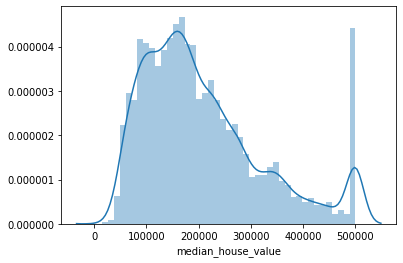

In [13]:

sns.distplot(y_train)

In [14]:
'''
for i in range(100):
    model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(6, activation=tf.nn.tanh)])
    la=RandomForestRegressor()
    reg=la.fit(x_train,y_train)
    y_pred=la.predict(x_test)
print(la.score(x_test,y_pred))
'''

'\nfor i in range(100):\n    model = tf.keras.Sequential([\n      tf.keras.layers.Flatten(),\n      tf.keras.layers.Dense(128, activation=tf.nn.relu),\n      tf.keras.layers.Dense(6, activation=tf.nn.tanh)])\n    la=RandomForestRegressor()\n    reg=la.fit(x_train,y_train)\n    y_pred=la.predict(x_test)\nprint(la.score(x_test,y_pred))\n'

In [15]:
print(x_train.skew())
print(x_test.skew())

longitude            -0.306662
latitude              0.473096
housing_median_age    0.062305
total_rooms           4.345725
total_bedrooms        3.625969
population            5.376877
households            3.546511
median_income         1.667930
dtype: float64
longitude            -0.261438
latitude              0.437140
housing_median_age    0.053415
total_rooms           3.279282
total_bedrooms        2.863318
population            2.909294
households            2.833561
median_income         1.561011
dtype: float64


In [16]:
print(y_train.kurt())
print(y_test.kurt())
print(x_train.kurt())
print(x_test.kurt())

0.35122664833720885
0.23913768582641381
longitude             -1.324354
latitude              -1.109811
housing_median_age    -0.795670
total_rooms           35.841453
total_bedrooms        24.193628
population            85.509658
households            23.927944
median_income          5.058311
dtype: float64
longitude             -1.354748
latitude              -1.149878
housing_median_age    -0.821087
total_rooms           18.157051
total_bedrooms        13.745506
population            15.952571
households            13.981540
median_income          4.522156
dtype: float64


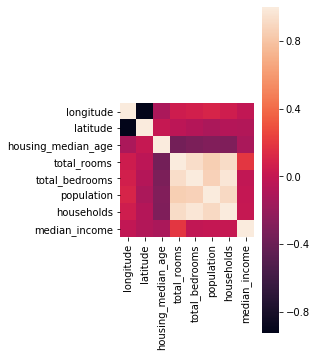

In [17]:
corrmat=x_train.corr()
f , ax=plt.subplots(figsize=(3,6))
sns.heatmap(corrmat,square=True)


In [18]:
'''sns.set()
colns=['latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
sns.pairplot(x_train[colns],size=3)
plt.show()'''

"sns.set()\ncolns=['latitude', 'housing_median_age', 'total_rooms',\n       'total_bedrooms', 'population', 'households', 'median_income']\nsns.pairplot(x_train[colns],size=3)\nplt.show()"

# RandomForest Model

In [19]:

la=RandomForestRegressor()

In [20]:
x_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [21]:
reg=la.fit(x_train,y_train)

C:\Users\moham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
print(la.score(x_train,y_train))

0.9618960848433336


In [23]:
'''
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)
y_=sv.predict(x_test)
sv.score(x_train,y_train)
'''

'\nfrom sklearn.svm import SVR\nsv=SVR()\nsv.fit(x_train,y_train)\ny_=sv.predict(x_test)\nsv.score(x_train,y_train)\n'

In [24]:
y_pred=la.predict(x_test)

In [25]:
print(la.score(x_test,y_pred))

1.0


In [26]:
y_pred[:10]

array([196120. , 351400. , 407750.1, 409800.2, 264760.1, 177370. ,
       115980. , 206770. , 314980.2, 123380. ])

In [27]:
y_test[:10]

20127    338100.0
18256    407200.0
10376    484100.0
4109     500001.0
8169     249200.0
1317     179500.0
10042    117100.0
11095    223800.0
9147     251800.0
12161    169300.0
Name: median_house_value, dtype: float64

In [28]:
mean_squared_error(y_test,y_pred)

2609692489.958067

In [29]:
mean_absolute_error(y_test,y_pred)

33834.607800387595